In [1]:
%pylab inline
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
from astropy.table import Table, join
import desispec.io
from desispec.coaddition import coadd_cameras,resample_spectra_lin_or_log

Populating the interactive namespace from numpy and matplotlib


In [2]:
#hdu_spectra_0=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.0/spectra-0.fits')
hdu_truth_0=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.0/truth-16-0.fits')
hdu_zbest_0=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.0/zbest-16-0.fits')

#hdu_spectra_1=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/spectra-0.fits')
hdu_truth_1=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/truth-16-0.fits')
hdu_zbest_1=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/zbest-16-0.fits')

#hdu_spectra_10=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/spectra-0.fits')
hdu_truth_10=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/truth-16-0.fits')
hdu_zbest_10=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/zbest-16-0.fits')

#hdu_spectra_20=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/spectra-0.fits')
hdu_truth_20=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/truth-16-0.fits')
hdu_zbest_20=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/zbest-16-0.fits')

#hdu_spectra_100=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/spectra-0.fits')
hdu_truth_100=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/truth-16-0.fits')
hdu_zbest_100=fits.open('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/zbest-16-0.fits')

In [3]:
z=hdu_zbest_0[1].data['Z']
wave_min = 3500
wave_max = 10000
wavelength = np.arange(wave_min,wave_max,0.19999384634318945)

In [4]:
specobj_100 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/spectra-0.fits')
specobj_100 = resample_spectra_lin_or_log(specobj_100,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_100 = coadd_cameras(specobj_100, cosmics_nsig=None)

specobj_20 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.3/spectra-0.fits')
specobj_20 = resample_spectra_lin_or_log(specobj_20,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_20 = coadd_cameras(specobj_20, cosmics_nsig=None)

specobj_10 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.2/spectra-0.fits')
specobj_10 = resample_spectra_lin_or_log(specobj_10,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_10 = coadd_cameras(specobj_10, cosmics_nsig=None)

specobj_1 = desispec.io.read_spectra('/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.1/spectra-0.fits')
specobj_1 = resample_spectra_lin_or_log(specobj_1,linear_step=0.8, wave_min =wave_min+1, wave_max =wave_max-1, fast = True)
specobj_1 = coadd_cameras(specobj_1, cosmics_nsig=None)

INFO:spectra.py:282:read_spectra: iotime 1.252 sec to read spectra-0.fits at 2021-09-27T08:42:39.396241
INFO:spectra.py:282:read_spectra: iotime 1.382 sec to read spectra-0.fits at 2021-09-27T08:42:52.457887
INFO:spectra.py:282:read_spectra: iotime 1.241 sec to read spectra-0.fits at 2021-09-27T08:43:04.796601
INFO:spectra.py:282:read_spectra: iotime 1.342 sec to read spectra-0.fits at 2021-09-27T08:43:17.058254


In [5]:
cont_interp = sp.interpolate.interp1d(wavelength,hdu_truth_0[3].data['TRUE_CONT'])
continuum_100 = cont_interp(specobj_100.wave['brz'])
continuum_20 = cont_interp(specobj_20.wave['brz'])
continuum_10 = cont_interp(specobj_10.wave['brz'])
continuum_1 = cont_interp(specobj_1.wave['brz'])

In [6]:
z_min=np.min(z)
z_max=np.max(z)
print("z_min = ", z_min)
print("z_max = ", z_max)
zbins = 100
sum_flux = np.zeros(zbins)

z_min =  1.8029756546020508
z_max =  3.607822895050049


In [7]:
lambda_min = 1420.0
lambda_max = 1520.0
lambda_min_obs = lambda_min*(1.0 + z)
lambda_max_obs = lambda_max*(1.0 + z)
print("lambda min obs")
print(lambda_min_obs)
print("lambda max obs")
print(lambda_max_obs)

lambda min obs
[5864.78569031 5284.67783451 4827.71304131 ... 4817.14709759 5050.63011169
 5747.22098827]
lambda max obs
[6277.79876709 5656.83824539 5167.69283295 ... 5156.38280869 5406.30828857
 6151.95486069]


In [8]:
wavelength_CIV_rf = [np.arange(lambda_min,lambda_max,1)]
print(wavelength_CIV_rf)

[array([1420., 1421., 1422., 1423., 1424., 1425., 1426., 1427., 1428.,
       1429., 1430., 1431., 1432., 1433., 1434., 1435., 1436., 1437.,
       1438., 1439., 1440., 1441., 1442., 1443., 1444., 1445., 1446.,
       1447., 1448., 1449., 1450., 1451., 1452., 1453., 1454., 1455.,
       1456., 1457., 1458., 1459., 1460., 1461., 1462., 1463., 1464.,
       1465., 1466., 1467., 1468., 1469., 1470., 1471., 1472., 1473.,
       1474., 1475., 1476., 1477., 1478., 1479., 1480., 1481., 1482.,
       1483., 1484., 1485., 1486., 1487., 1488., 1489., 1490., 1491.,
       1492., 1493., 1494., 1495., 1496., 1497., 1498., 1499., 1500.,
       1501., 1502., 1503., 1504., 1505., 1506., 1507., 1508., 1509.,
       1510., 1511., 1512., 1513., 1514., 1515., 1516., 1517., 1518.,
       1519.])]


In [9]:
all_forests = []
all_forests_rf = []
all_fluxes_100 = []
all_fluxes_20 = []
all_fluxes_10 = []
all_fluxes_1 = []
all_cont_100 = []
all_cont_20 = []
all_cont_10 = []
all_cont_1 = []
all_trans_100 = []
all_trans_20 = []
all_trans_10 = []
all_trans_1 = []

trans_100 = specobj_100.flux['brz']/continuum_100
trans_20 = specobj_20.flux['brz']/continuum_20
trans_10 = specobj_10.flux['brz']/continuum_10
trans_1 = specobj_1.flux['brz']/continuum_1

In [10]:
Flux_CIV_100 = []
Flux_CIV_20 = []
Flux_CIV_10 = []
Flux_CIV_1 = []

Flux_CIV_100 = np.ones(np.shape(specobj_100.flux['brz']))
Flux_CIV_20 = np.ones(np.shape(specobj_20.flux['brz']))
Flux_CIV_10 = np.ones(np.shape(specobj_10.flux['brz']))
Flux_CIV_1 = np.ones(np.shape(specobj_1.flux['brz']))

Cont_CIV_100 = np.ones(np.shape(continuum_100))
Cont_CIV_20 = np.ones(np.shape(continuum_20))
Cont_CIV_10 = np.ones(np.shape(continuum_10))
Cont_CIV_1 = np.ones(np.shape(continuum_1))

In [11]:
print(np.shape(specobj_1.flux['brz']))
print(np.shape(continuum_100))

(1029, 8123)
(1029, 8123)


In [12]:
for i in range(0,len(lambda_min_obs)):
    # Masks the CIV forest
    CIV_mask_1   = (specobj_1.wave["brz"]   < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_10  = (specobj_10.wave["brz"]  < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_20  = (specobj_20.wave["brz"]  < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    CIV_mask_100 = (specobj_100.wave["brz"] < lambda_max_obs[i]) & (specobj_1.wave["brz"] > lambda_min_obs[i])
    
    # Masks spectra
    
    Flux_CIV_100[i][CIV_mask_100] = specobj_100.flux['brz'][i][CIV_mask_100]
    Flux_CIV_20[i][CIV_mask_20]   = specobj_20.flux['brz'][i][CIV_mask_20]
    Flux_CIV_10[i][CIV_mask_10]   = specobj_10.flux['brz'][i][CIV_mask_10]
    Flux_CIV_1[i][CIV_mask_1]     = specobj_1.flux['brz'][i][CIV_mask_1]
    # Masks continua
    Cont_CIV_100[i][CIV_mask_100] = continuum_100[i][CIV_mask_100]
    Cont_CIV_20[i][CIV_mask_20]   = continuum_20[i][CIV_mask_20]
    Cont_CIV_10[i][CIV_mask_10]   = continuum_10[i][CIV_mask_10]
    Cont_CIV_1[i][CIV_mask_1]     = continuum_1[i][CIV_mask_1]
    #Cont_CIV_20 = continuum_20[i][CIV_mask_20]
    #Cont_CIV_10 = continuum_10[i][CIV_mask_10]
    #Cont_CIV_1 = continuum_1[i][CIV_mask_1]
  
    # Makes 1 whatever isn't in the CIV forest
    trans_100[i][~CIV_mask_100] = 1.
    trans_20[i][~CIV_mask_20]   = 1.
    trans_10[i][~CIV_mask_10]   = 1.
    trans_1[i][~CIV_mask_1]     = 1.

In [13]:
mean_flux_transmission_100 = np.mean(trans_100,axis=0)
mean_flux_transmission_20  = np.mean(trans_20,axis=0)
mean_flux_transmission_10  = np.mean(trans_10,axis=0)
mean_flux_transmission_1   = np.mean(trans_1,axis=0)

In [14]:
mean_flux_transmission_100_matrix = np.ones(np.shape(continuum_100))
mean_flux_transmission_20_matrix  = np.ones(np.shape(continuum_20))
mean_flux_transmission_10_matrix  = np.ones(np.shape(continuum_10))
mean_flux_transmission_1_matrix   = np.ones(np.shape(continuum_1))

In [15]:
for j in range(0,len(lambda_min_obs)):
    # Masks the CIV forest
    CIV_mask_1   = (specobj_1.wave["brz"]   < lambda_max_obs[j]) & (specobj_1.wave["brz"] > lambda_min_obs[j])
    CIV_mask_10  = (specobj_10.wave["brz"]  < lambda_max_obs[j]) & (specobj_1.wave["brz"] > lambda_min_obs[j])
    CIV_mask_20  = (specobj_20.wave["brz"]  < lambda_max_obs[j]) & (specobj_1.wave["brz"] > lambda_min_obs[j])
    CIV_mask_100 = (specobj_100.wave["brz"] < lambda_max_obs[j]) & (specobj_1.wave["brz"] > lambda_min_obs[j])
    
    # Masks mean_flux_transmission
    mean_flux_transmission_100_matrix[j][CIV_mask_100] = mean_flux_transmission_100[CIV_mask_100]
    mean_flux_transmission_20_matrix[j][CIV_mask_20]   = mean_flux_transmission_100[CIV_mask_20]
    mean_flux_transmission_10_matrix[j][CIV_mask_10]   = mean_flux_transmission_100[CIV_mask_10]
    mean_flux_transmission_1_matrix[j][CIV_mask_1]     = mean_flux_transmission_100[CIV_mask_1]
    

In [16]:
#Masked mean flux transmission
Meanflux_CIV_100 = np.ones(np.shape(mean_flux_transmission_100))
Meanflux_CIV_20  = np.ones(np.shape(mean_flux_transmission_20))
Meanflux_CIV_10  = np.ones(np.shape(mean_flux_transmission_10))
Meanflux_CIV_1   = np.ones(np.shape(mean_flux_transmission_1))


In [17]:
Meanflux_CIV_100[~CIV_mask_100] = 1.
Meanflux_CIV_20[~CIV_mask_20] = 1.
Meanflux_CIV_10[~CIV_mask_10] = 1.
Meanflux_CIV_1[~CIV_mask_1] = 1.

In [18]:
"""
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"],Flux_CIV_100[15])
"""

'\nplt.figure(figsize=(20,10))\nplt.plot(specobj_100.wave["brz"],Flux_CIV_100[15])\n'

In [19]:
"""
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], specobj_100.flux['brz'][1], color="deeppink", label="x100")
plt.plot(specobj_100.wave["brz"], Flux_CIV_100[1], color="lightskyblue", label="x100")
plt.plot(specobj_100.wave["brz"], Flux_CIV_20[1], color="cornflowerblue", label="x20")
plt.plot(specobj_100.wave["brz"], Flux_CIV_10[1], color="royalblue", label="x10")
plt.plot(specobj_100.wave["brz"], Flux_CIV_1[1], color="navy", label="x1")
plt.plot(specobj_100.wave["brz"], Cont_CIV_100[1], color="lightskyblue", label="Continuum")
#plt.xlim(4000,5000)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], specobj_100.flux['brz'][1], color="deeppink", label="Spectrum")
plt.plot(specobj_100.wave["brz"], Flux_CIV_100[1], color="lightskyblue", label="x100")
plt.plot(specobj_20.wave["brz"],  Flux_CIV_20[1],  color="cornflowerblue", label="x20")
plt.plot(specobj_10.wave["brz"],  Flux_CIV_10[1],  color="royalblue", label="x10")
plt.plot(specobj_1.wave["brz"],   Flux_CIV_1[1],   color="navy", label="x1")
plt.plot(specobj_100.wave["brz"], Cont_CIV_100[1], color="lightskyblue", label="Continuum")
plt.xlim(5200,5800)
plt.ylim(0,1.5)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], Flux_CIV_100[1], color="lightskyblue")
plt.plot(specobj_100.wave["brz"], Flux_CIV_20[1],  color="cornflowerblue", label="x20")
plt.plot(specobj_100.wave["brz"], Flux_CIV_10[1],  color="royalblue", label="x10")
plt.plot(specobj_100.wave["brz"], Flux_CIV_1[1],   color="navy", label="x1")
#plt.xlim(4000,5000)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], Cont_CIV_100[1], color = "crimson")
plt.plot(specobj_20.wave["brz"],  Cont_CIV_20[1],  color = "crimson")
plt.plot(specobj_10.wave["brz"],  Cont_CIV_10[1],  color = "crimson")
plt.plot(specobj_1.wave["brz"],   Cont_CIV_1[1],   color = "crimson")
#plt.xlim(4000,5000)
plt.show()

plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], Flux_CIV_100[1]/Cont_CIV_100[1], color ="lightskyblue",   label="x100")
plt.plot(specobj_20.wave["brz"],  Flux_CIV_20[1] /Cont_CIV_20[1],  color ="cornflowerblue", label="x20")
plt.plot(specobj_10.wave["brz"],  Flux_CIV_10[1] /Cont_CIV_10[1],  color ="royalblue",      label="x10")
plt.plot(specobj_1.wave["brz"],   Flux_CIV_1[1]  /Cont_CIV_1[1],   color ="navy",           label="x1")
#plt.xlim(4000,5000)
plt.show()
#plt.plot(specobj_100.wave["brz"][CIV_mask_100],Flux_CIV_100[15]/Cont_CIV_100[15])
#plt.plot(trans_100[15])
#plt.show()
"""

'\nplt.figure(figsize=(20,10))\nplt.plot(specobj_100.wave["brz"], specobj_100.flux[\'brz\'][1], color="deeppink", label="x100")\nplt.plot(specobj_100.wave["brz"], Flux_CIV_100[1], color="lightskyblue", label="x100")\nplt.plot(specobj_100.wave["brz"], Flux_CIV_20[1], color="cornflowerblue", label="x20")\nplt.plot(specobj_100.wave["brz"], Flux_CIV_10[1], color="royalblue", label="x10")\nplt.plot(specobj_100.wave["brz"], Flux_CIV_1[1], color="navy", label="x1")\nplt.plot(specobj_100.wave["brz"], Cont_CIV_100[1], color="lightskyblue", label="Continuum")\n#plt.xlim(4000,5000)\nplt.show()\n\nplt.figure(figsize=(20,10))\nplt.plot(specobj_100.wave["brz"], specobj_100.flux[\'brz\'][1], color="deeppink", label="Spectrum")\nplt.plot(specobj_100.wave["brz"], Flux_CIV_100[1], color="lightskyblue", label="x100")\nplt.plot(specobj_20.wave["brz"],  Flux_CIV_20[1],  color="cornflowerblue", label="x20")\nplt.plot(specobj_10.wave["brz"],  Flux_CIV_10[1],  color="royalblue", label="x10")\nplt.plot(specobj

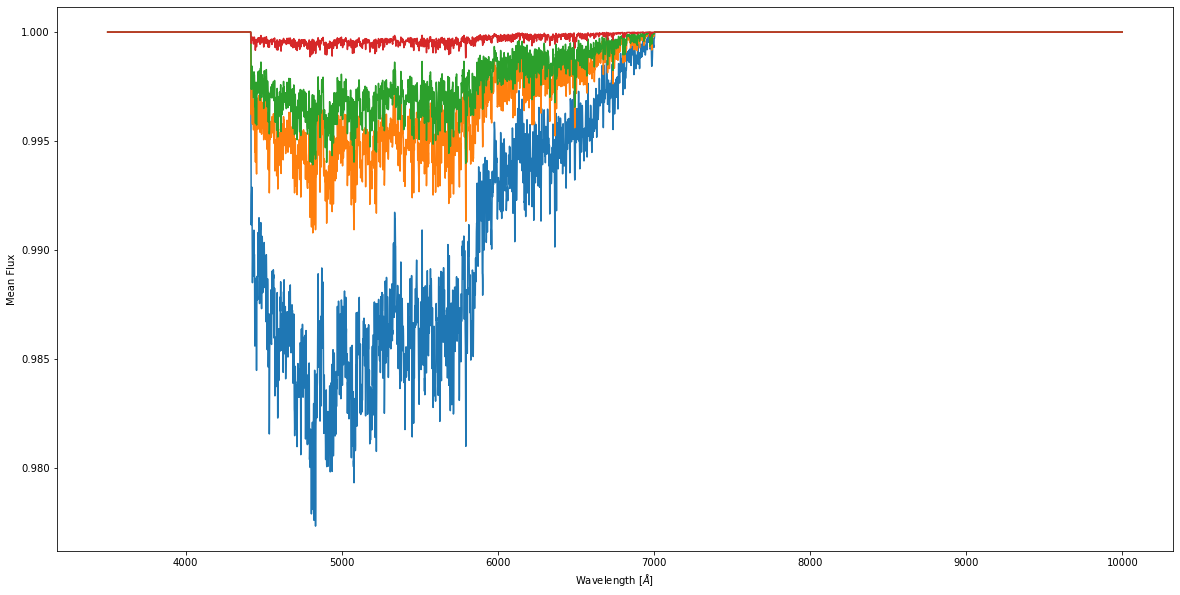

In [20]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"],mean_flux_transmission_100)
plt.plot(specobj_20.wave["brz"],mean_flux_transmission_20)
plt.plot(specobj_10.wave["brz"],mean_flux_transmission_10)
plt.plot(specobj_1.wave["brz"],mean_flux_transmission_1)
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Mean Flux")
plt.savefig("meanflux.png")

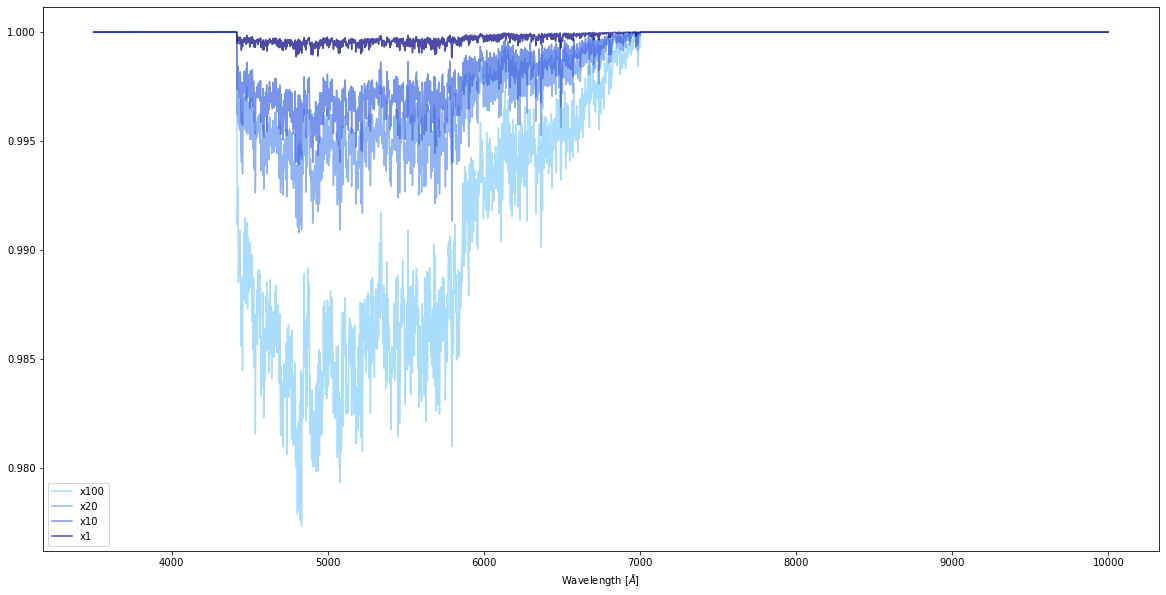

In [21]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"],mean_flux_transmission_100, alpha=0.7, color="lightskyblue",    label="x100")
plt.plot(specobj_20.wave["brz"], mean_flux_transmission_20,  alpha=0.7, color= "cornflowerblue", label="x20")
plt.plot(specobj_10.wave["brz"], mean_flux_transmission_10,  alpha=0.7, color="royalblue",       label="x10")
plt.plot(specobj_1.wave["brz"],  mean_flux_transmission_1,   alpha=0.7, color="navy",            label="x1")
plt.legend()
plt.xlabel("Wavelength [$\AA$]")
plt.savefig("meanflux_allCIV.png")

In [22]:
"""
delta_100 = ((Flux_CIV_100) / (Cont_CIV_100 * mean_flux_transmission_100)) -1
delta_20 =  ((Flux_CIV_20)  / (Cont_CIV_20  * mean_flux_transmission_20))  -1
delta_10 =  ((Flux_CIV_10)  / (Cont_CIV_10  * mean_flux_transmission_10))  -1
delta_1 =   ((Flux_CIV_1)   / (Cont_CIV_1   * mean_flux_transmission_1))   -1
"""

'\ndelta_100 = ((Flux_CIV_100) / (Cont_CIV_100 * mean_flux_transmission_100)) -1\ndelta_20 =  ((Flux_CIV_20)  / (Cont_CIV_20  * mean_flux_transmission_20))  -1\ndelta_10 =  ((Flux_CIV_10)  / (Cont_CIV_10  * mean_flux_transmission_10))  -1\ndelta_1 =   ((Flux_CIV_1)   / (Cont_CIV_1   * mean_flux_transmission_1))   -1\n'

In [23]:
delta_100 = ((Flux_CIV_100) / (Cont_CIV_100 * mean_flux_transmission_100_matrix)) -1
delta_20  = ((Flux_CIV_20)  / (Cont_CIV_20  * mean_flux_transmission_20_matrix)) -1
delta_10  = ((Flux_CIV_10)  / (Cont_CIV_10  * mean_flux_transmission_10_matrix)) -1
delta_1   = ((Flux_CIV_1)   / (Cont_CIV_1   * mean_flux_transmission_1_matrix)) -1
#delta_20 =  ((Flux_CIV_20)  / (Cont_CIV_20  * mean_flux_transmission_20))  -1
#delta_10 =  ((Flux_CIV_10)  / (Cont_CIV_10  * mean_flux_transmission_10))  -1
#delta_1 =   ((Flux_CIV_1)   / (Cont_CIV_1   * mean_flux_transmission_1))   -1

In [24]:
loglam_100 = np.log10(specobj_100.wave["brz"])
loglam_20  = np.log10(specobj_20.wave["brz"])
loglam_10  = np.log10(specobj_10.wave["brz"])
loglam_1   = np.log10(specobj_1.wave["brz"])

In [25]:
"""
print(np.shape(Flux_CIV_100))
print(np.shape(Cont_CIV_100))
print(np.shape(mean_flux_transmission_100))
"""

'\nprint(np.shape(Flux_CIV_100))\nprint(np.shape(Cont_CIV_100))\nprint(np.shape(mean_flux_transmission_100))\n'

In [26]:
"""
plt.plot(specobj_100.wave["brz"], Flux_CIV_100[34], alpha=0.7, label="Flux")
plt.plot(specobj_100.wave["brz"], Cont_CIV_100[34], alpha=0.7, label="Continuum")
plt.legend()
plt.show()
plt.plot(specobj_100.wave["brz"], Flux_CIV_100[34]/Cont_CIV_100[34], alpha=0.7, label="Transmission")
plt.legend()
plt.show()
plt.plot(specobj_100.wave["brz"], mean_flux_transmission_100_matrix[34], alpha=0.7, label="Mean_Flux_trans")
plt.legend()
plt.show()
"""

'\nplt.plot(specobj_100.wave["brz"], Flux_CIV_100[34], alpha=0.7, label="Flux")\nplt.plot(specobj_100.wave["brz"], Cont_CIV_100[34], alpha=0.7, label="Continuum")\nplt.legend()\nplt.show()\nplt.plot(specobj_100.wave["brz"], Flux_CIV_100[34]/Cont_CIV_100[34], alpha=0.7, label="Transmission")\nplt.legend()\nplt.show()\nplt.plot(specobj_100.wave["brz"], mean_flux_transmission_100_matrix[34], alpha=0.7, label="Mean_Flux_trans")\nplt.legend()\nplt.show()\n'

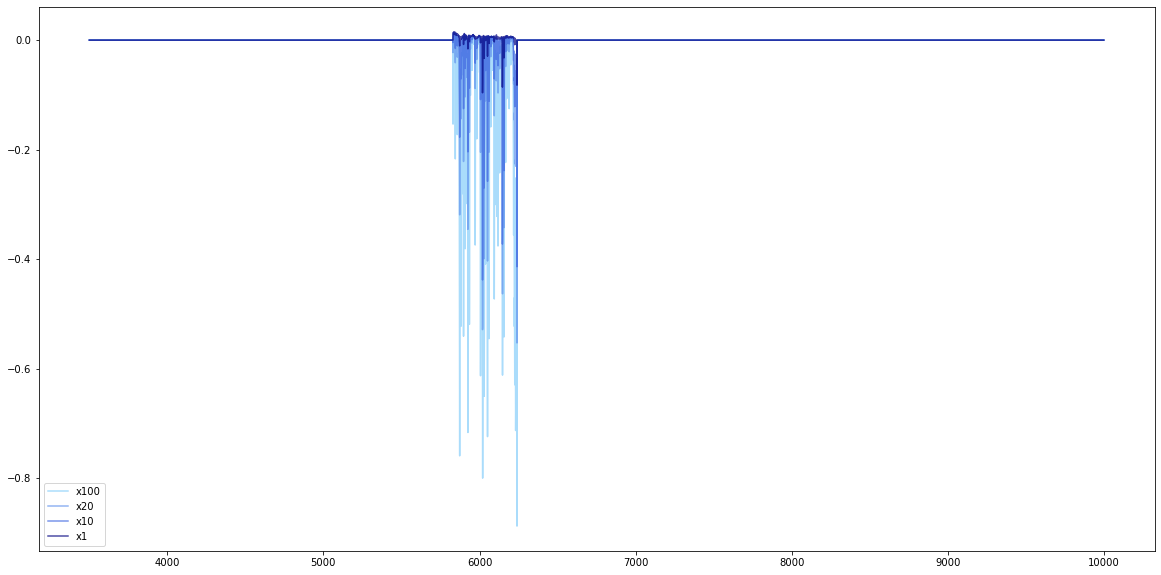

In [27]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], delta_100[26], alpha=0.7, color="lightskyblue",    label="x100")
plt.plot(specobj_20.wave["brz"] ,  delta_20[26], alpha=0.7, color= "cornflowerblue", label="x20")
plt.plot(specobj_10.wave["brz"] ,  delta_10[26], alpha=0.7, color="royalblue",       label="x10")
plt.plot(specobj_1.wave["brz"]  ,   delta_1[26], alpha=0.7, color="navy",            label="x1")
plt.legend()
#plt.ylim(-0.02,0.02)
plt.show()

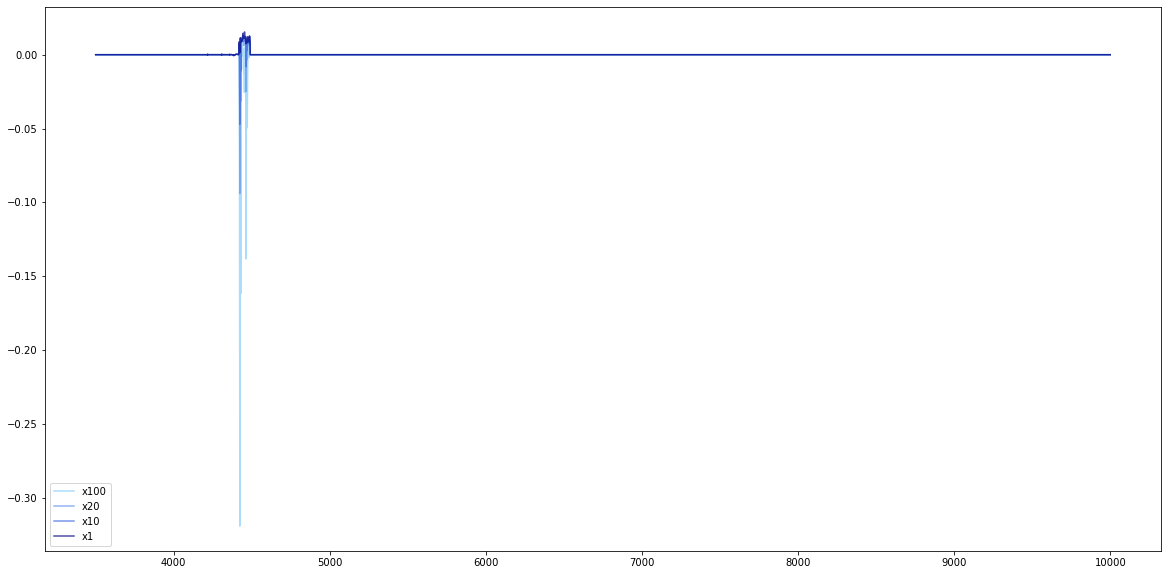

In [28]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], delta_100[72], alpha=0.7, color="lightskyblue",    label="x100")
plt.plot(specobj_20.wave["brz"] ,  delta_20[72], alpha=0.7, color= "cornflowerblue", label="x20")
plt.plot(specobj_10.wave["brz"] ,  delta_10[72], alpha=0.7, color="royalblue",       label="x10")
plt.plot(specobj_1.wave["brz"]  ,   delta_1[72], alpha=0.7, color="navy",            label="x1")
plt.legend()
#plt.ylim(-0.02,0.02)
plt.show()

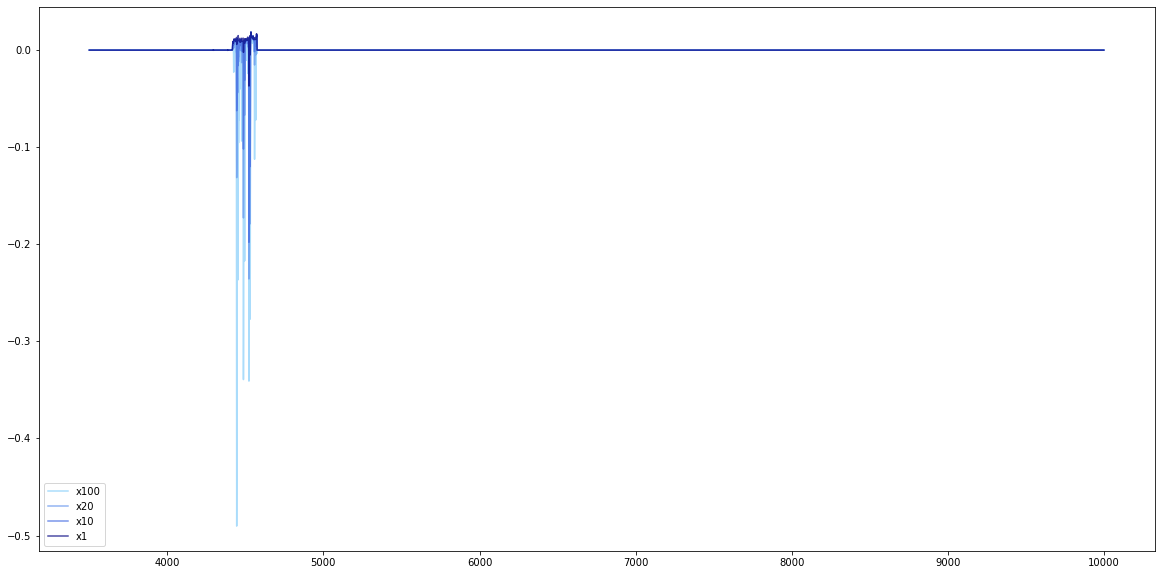

In [29]:
plt.figure(figsize=(20,10))
plt.plot(specobj_100.wave["brz"], delta_100[98], alpha=0.7, color="lightskyblue",    label="x100")
plt.plot(specobj_20.wave["brz"] ,  delta_20[98], alpha=0.7, color= "cornflowerblue", label="x20")
plt.plot(specobj_10.wave["brz"] ,  delta_10[98], alpha=0.7, color="royalblue",       label="x10")
plt.plot(specobj_1.wave["brz"]  ,   delta_1[98], alpha=0.7, color="navy",            label="x1")
plt.legend()
#plt.ylim(-0.02,0.02)
plt.show()

In [30]:
"""
# WE NEED

RA
DEC
Z
TARGET_ID
ORDER

LOGLAM
DELTA
WEIGHT
CONT
"""

'\n# WE NEED\n\nRA\nDEC\nZ\nTARGET_ID\nORDER\n\nLOGLAM\nDELTA\nWEIGHT\nCONT\n'

In [31]:
"""
Forest.log_lambda_min = np.log10(args.lambda_min)
    Forest.log_lambda_max = np.log10(args.lambda_max)
    Forest.log_lambda_min_rest_frame = np.log10(args.lambda_rest_min)
    Forest.log_lambda_max_rest_frame = np.log10(args.lambda_rest_max)
"""

'\nForest.log_lambda_min = np.log10(args.lambda_min)\n    Forest.log_lambda_max = np.log10(args.lambda_max)\n    Forest.log_lambda_min_rest_frame = np.log10(args.lambda_rest_min)\n    Forest.log_lambda_max_rest_frame = np.log10(args.lambda_rest_max)\n'

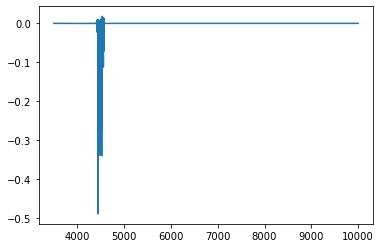

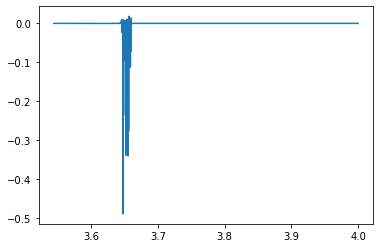

In [32]:
plt.plot(specobj_100.wave["brz"], delta_100[98])
plt.show()
plt.plot(loglam_100, delta_100[98])
plt.show()

In [33]:
import fitsio

In [34]:
"""

outdir = 'path/to/deltas'

#-- loop over healpix pixels
for healpix in sorted(deltas.keys()):

    delta_filename = f"{outdir}/delta-{healpix}.fits.gz"
    results = fitsio.FITS(delta_filename, 'rw', clobber=True)

    for delta in deltas[healpix]:
        header = [  {'name': 'RA', 'value': delta.ra, 'comment': 'Right Ascension [rad]'},
                    {'name': 'DEC', 'value': delta.dec, 'comment': 'Declination [rad]'},
                    {'name': 'Z', 'value': delta.z_qso, 'comment': 'Redshift'},
                    {'name': 'PMF', 'value': f'{%delta.plate}-{delta.mjd}-{delta.fiberid}'},
                    {'name': 'THING_ID', 'value': delta.thingid, 'comment': 'Object identification'},
                    {'name': 'PLATE', 'value': delta.plate},
                    {'name': 'MJD', 'value': delta.mjd, 'comment': 'Modified Julian date'},
                    {'name': 'FIBERID', 'value': delta.fiberid},
                    {'name': 'ORDER', 'value': delta.order, 'comment': 'Order of the continuum fit'},
                    {'name': "BLINDING", 'value': blinding, 'comment': 'String specifying the blinding strategy'},
                ]
        cols = [delta.log_lambda, delta.delta, delta.weights, delta.cont]
        names = ['LOGLAM', 'DELTA', 'WEIGHT', 'CONT']
        units = ['log Angstrom', '', '', '']
        comments = ['Log lambda', 'Delta field', 'Pixel weights', 'Continuum']

        results.write(cols,
                        names=names,
                        header=header,
                        comment=comments,
                        units=units,
                        extname=str(delta.thingid))
        
        results.close()
        
"""

'\n\noutdir = \'path/to/deltas\'\n\n#-- loop over healpix pixels\nfor healpix in sorted(deltas.keys()):\n\n    delta_filename = f"{outdir}/delta-{healpix}.fits.gz"\n    results = fitsio.FITS(delta_filename, \'rw\', clobber=True)\n\n    for delta in deltas[healpix]:\n        header = [  {\'name\': \'RA\', \'value\': delta.ra, \'comment\': \'Right Ascension [rad]\'},\n                    {\'name\': \'DEC\', \'value\': delta.dec, \'comment\': \'Declination [rad]\'},\n                    {\'name\': \'Z\', \'value\': delta.z_qso, \'comment\': \'Redshift\'},\n                    {\'name\': \'PMF\', \'value\': f\'{%delta.plate}-{delta.mjd}-{delta.fiberid}\'},\n                    {\'name\': \'THING_ID\', \'value\': delta.thingid, \'comment\': \'Object identification\'},\n                    {\'name\': \'PLATE\', \'value\': delta.plate},\n                    {\'name\': \'MJD\', \'value\': delta.mjd, \'comment\': \'Modified Julian date\'},\n                    {\'name\': \'FIBERID\', \'value\':

In [35]:
"""
delta_file = f"/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/Picca/Delta_CIV/Delta/delta_100.fits.gz"

results  = fitsio.FITS(delta_file, 'rw', clobber=True)

header   = [{'name': 'RA',  'value': hdu_zbest_0[2].data["TARGET_RA"],  'comment': 'Right Ascension [rad]'},
            {'name': 'DEC', 'value': hdu_zbest_0[2].data["TARGET_DEC"], 'comment': 'Declination [rad]'},
            {'name': 'Z',   'value': z,                                 'comment': 'Redshift'},
            {'name': 'TARGETID', 'value':hdu_zbest_0[2].data["TARGETID"], 'comment': 'Target ID'}
                
                ]

for i in range(len(delta_100)):
    cols     = [loglam_100, delta_100[i]]
    names    = ['LOGLAM', 'DELTA']
    units    = ['LogAngstrom','']
    comments = ['Log Lambda', 'delta field']


    results.write(cols,
                  names = names,
                  header=header,
                  comment=comments,
                  units=units,
                  extname  =  str(hdu_zbest_0[2].data["TARGETID"][i])
                 )
                
results.close()
"""

'\ndelta_file = f"/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/Picca/Delta_CIV/Delta/delta_100.fits.gz"\n\nresults  = fitsio.FITS(delta_file, \'rw\', clobber=True)\n\nheader   = [{\'name\': \'RA\',  \'value\': hdu_zbest_0[2].data["TARGET_RA"],  \'comment\': \'Right Ascension [rad]\'},\n            {\'name\': \'DEC\', \'value\': hdu_zbest_0[2].data["TARGET_DEC"], \'comment\': \'Declination [rad]\'},\n            {\'name\': \'Z\',   \'value\': z,                                 \'comment\': \'Redshift\'},\n            {\'name\': \'TARGETID\', \'value\':hdu_zbest_0[2].data["TARGETID"], \'comment\': \'Target ID\'}\n                \n                ]\n\nfor i in range(len(delta_100)):\n    cols     = [loglam_100, delta_100[i]]\n    names    = [\'LOGLAM\', \'DELTA\']\n    units    = [\'LogAngstrom\',\'\']\n    comments = [\'Log Lambda\', \'delta field\']\n\n\n    results.write(cols,\n                  names = names,\n                  header=header,\n                  comment=comme

In [36]:
weights=np.ones(np.shape(loglam_100[CIV_mask_100]))
#print(weights)

In [37]:
from random import seed
from random import random
# seed random number generator
seed(1)
# generate some random numbers
print(random(), random(), random())

0.13436424411240122 0.8474337369372327 0.763774618976614


In [38]:
thingid = [i for i in range(len(delta_100))]
#print(thingid)

In [39]:
delta_file = f"/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/Picca/Delta_CIV/Delta/delta_100_m.fits.gz"

results  = fitsio.FITS(delta_file, 'rw', clobber=True)
#results  = fitsio.FITS(delta_file, 'rw', clobber=True)

for i in range(len(delta_100)):
    
    header   = [{'name': 'RA',  'value': np.radians(hdu_zbest_0[2].data["TARGET_RA"][i]),  'comment': 'Right Ascension [rad]'},
                {'name': 'DEC', 'value': np.radians(hdu_zbest_0[2].data["TARGET_DEC"][i]), 'comment': 'Declination [rad]'},
                {'name': 'Z',   'value': z[i],                                 'comment': 'Redshift'},
                {'name': 'TARGETID', 'value':hdu_zbest_0[2].data["TARGETID"][i], 'comment': 'Target ID'},
                {'name': 'THING_ID', 'value':thingid[i], 'comment': 'Thing ID (fake)'},
                {'name': 'PLATE', 'value':thingid[i], 'comment': 'Plate (fake)'},
                {'name': 'MJD', 'value':thingid[i], 'comment': 'MJD (fake)'},
                {'name': 'FIBERID', 'value':thingid[i], 'comment': 'fiberid (fake)'},
                                ]
        
    CIV_mask_100 = (loglam_100 < np.log10(lambda_max_obs[i])) & (loglam_100 > np.log10(lambda_min_obs[i]))
        
    cols     = [loglam_100[CIV_mask_100], delta_100[i][CIV_mask_100], np.ones(np.shape(loglam_100[CIV_mask_100])), continuum_100[i][CIV_mask_100]]
    names    = ['LOGLAM', 'DELTA', 'WEIGHT', 'CONT']
    units    = ['LogAngstrom','', '','']
    comments = ['Log Wavelength', 'delta field', 'weight', 'continuum']


    results.write(cols,
                  names   = names,
                  header  = header,
                  comment = comments,
                  units   = units,
                  extname  =  str(hdu_zbest_0[2].data["TARGETID"][i])
                 )
                
results.close()


<ipython-input-39-30887fda7abe>:26: DeprecationWarning: The keyword arguments '{'comment': ['Log Wavelength', 'delta field', 'weight', 'continuum']}' are being ignored! This warning will be an error in a future version of `fitsio`!
  results.write(cols,


In [40]:
#print(len(specobj_100.wave["brz"]))
#print(len(delta_100))

In [41]:
hdu_delta = fits.open("/global/cscratch1/sd/andreamg/v9/CIV-forest/quick-2.4/Picca/Delta_CIV/Delta/delta_100_m.fits.gz")

In [42]:
#hdu_delta.info()

In [43]:
hdu_delta[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   32 / width of table in bytes                        
NAXIS2  =                  516 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    4 / number of fields in each row                   
TTYPE1  = 'LOGLAM  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'LogAngstrom'        / physical unit of field                         
TTYPE2  = 'DELTA   '           / label for field   2                            
TFORM2  = 'D       '        